<a href="https://colab.research.google.com/github/San-lab-ship/car-ads-dashboard/blob/main/vehiculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis Exploratorio de Datos de Vehículos
Este script carga un conjunto de datos CSV, realiza una limpieza básica y genera visualizaciones clave para la exploración de datos.

### Paso 1: Carga del conjunto de datos 'vehicles_us.csv'
Por favor, selecciona el archivo CSV desde tu computadora cuando se te solicite.


Saving vehicles_us (2).csv to vehicles_us (2) (9).csv
Archivo 'vehicles_us (2) (9).csv' cargado exitosamente.

### Paso 2: Análisis Preliminar y Preparación de Datos

Primeras 5 filas del DataFrame:
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22    

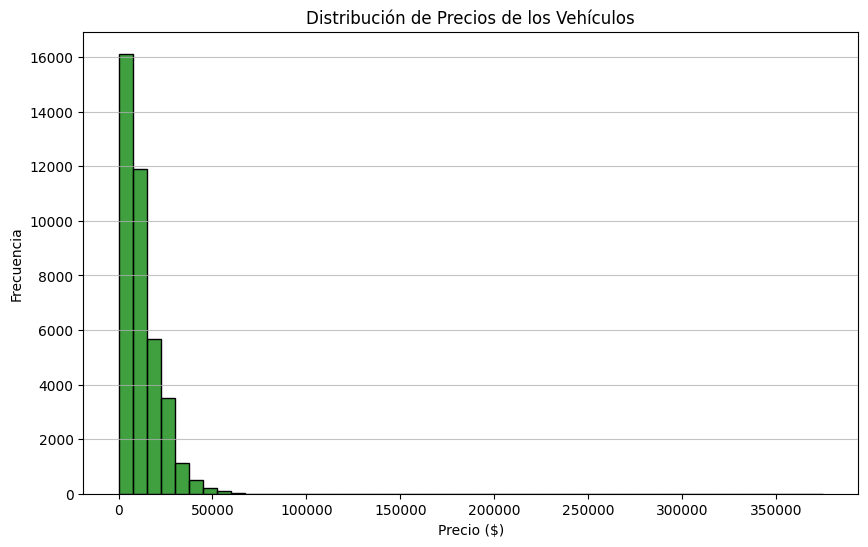


Generando Gráfico de Dispersión: Precio vs. Kilometraje


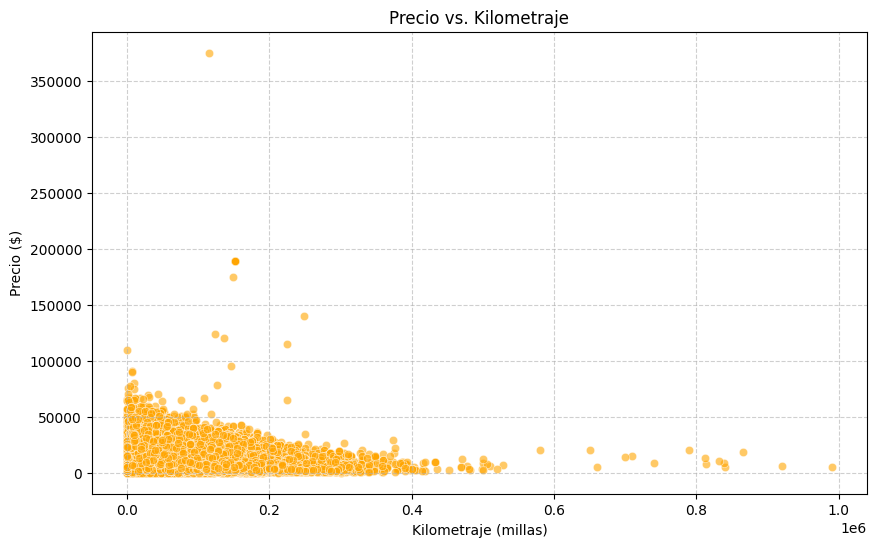


Análisis exploratorio de datos completado exitosamente.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

print("## Análisis Exploratorio de Datos de Vehículos")
print("Este script carga un conjunto de datos CSV, realiza una limpieza básica y genera visualizaciones clave para la exploración de datos.")

print("\n### Paso 1: Carga del conjunto de datos 'vehicles_us.csv'")
print("Por favor, selecciona el archivo CSV desde tu computadora cuando se te solicite.")

try:
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    df = pd.read_csv(io.BytesIO(uploaded[file_name]))
    print(f"Archivo '{file_name}' cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    print("Asegúrate de haber seleccionado el archivo 'vehicles_us.csv'.")
    exit()

print("\n### Paso 2: Análisis Preliminar y Preparación de Datos")

print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

print("\nInformación general del DataFrame:")
df.info()

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nRecuento de valores nulos antes de la limpieza:")
print(df.isnull().sum())

df.loc[:, 'model_year'] = df['model_year'].fillna(df['model_year'].median())

df.dropna(subset=['price', 'odometer', 'cylinders', 'condition'], inplace=True)

print("\nRecuento de valores nulos después de la preparación de datos:")
print(df.isnull().sum())
print(f"\nDimensiones del DataFrame después de la limpieza: {df.shape[0]} filas, {df.shape[1]} columnas.")

print("\n### Paso 3: Generación de Visualizaciones Clave (Estáticas con Seaborn/Matplotlib)")

print("\nGenerando Histograma de Precios")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de Precios de los Vehículos')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("\nGenerando Gráfico de Dispersión: Precio vs. Kilometraje")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['odometer'], y=df['price'], color='orange', alpha=0.6)
plt.title('Precio vs. Kilometraje')
plt.xlabel('Kilometraje (millas)')
plt.ylabel('Precio ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nAnálisis exploratorio de datos completado exitosamente.")